<a href="https://colab.research.google.com/github/shineloveyc/Deep-Learning_Exercise/blob/main/Text_Propressing_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data from URL 

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = 'http://www.gutenberg.org/files/1342/1342-0.txt'

from urllib.request import urlopen

f = urlopen(path)
text = f.read()


In [ ]:
text = text.decode("utf-8")

# One Hot Encoding Data

In [ ]:
"""ASCII encodes 128 characters using 128 integers. 
Popular encod- ings include UTF-8, UTF-16 and UTF-32, 
in which the numbers are a sequence of 8-, 16-, or 32-bit integers. Strings in Python 3.x are Unicode strings."""
lines = text.split('\n')
line = lines[300]
line

'      daughter employed in trimming a hat, he suddenly addressed her\r'

In [ ]:
#128 hardcode due to the limit of ASCII
letter_tensor = torch.zeros(len(line), 128)
letter_tensor.shape

torch.Size([69, 128])

In [ ]:
#set 1 on each row in the right position
#ord()Given a string of length one, return an integer representing the Unicode code point of the character when the argument is a unicode object
for i, letter in enumerate(line.lower().strip()):
  letter_index = ord(letter) if ord(letter) < 128 else 0
  letter_tensor[i][letter_index] = 1

Same way above could be used to tenosr word, create vocabulary and one-hot encoding setences, sequences of words, along the rows of the tensor

In [ ]:
#def clean words
def clean_words(input_str):
  punctuation = '.,:"!?""_-'
  word_list = input_str.lower().replace('\n', '').split()
  #remove punctuation
  word_list = [word.strip(punctuation) for word in word_list]
  return word_list

words_in_line = clean_words(line)

In [ ]:
#define a dictionary of words in document
word_dict = sorted(set(clean_words(text)))

#index the dict
word2index_dict = {word: i for (i, word) in enumerate(word_dict)}

len(word2index_dict), word2index_dict['impossible']

(9268, 4159)

In [ ]:
#one-hot encoding text
word_tensor = torch.zeros(len(words_in_line), len(word2index_dict))

for i, word in enumerate(words_in_line):
  #get dict key
  word_index = word2index_dict[word]
  word_tensor[i][word_index] =1
  print('{:2} {:4}'.format(i, word_index, word))

print(word_tensor.shape)

 0 2011
 1 2714
 2 4189
 3 8211
 4  136
 5 3802
 6 3819
 7 7771
 8  271
 9 3868
torch.Size([10, 9268])


# One Hot Encoding using Skelarn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

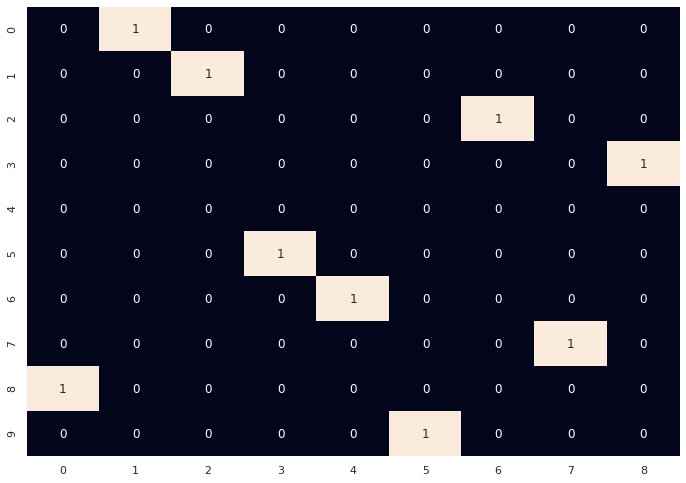

In [ ]:
one_hot_vectorizer = CountVectorizer(binary=True)

one_hot = one_hot_vectorizer.fit_transform(words_in_line).toarray()

import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(one_hot, annot = True, cbar = False)

Text(0.5, 50.92999999999999, 'Word')

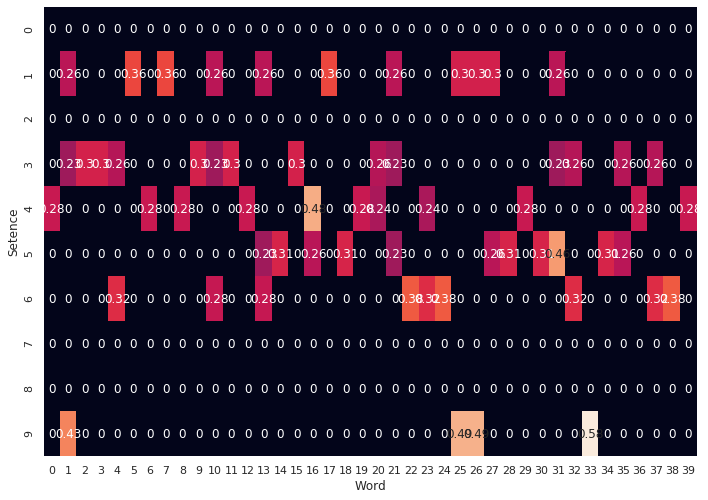

In [ ]:
#TF-IDF Representation
from sklearn.feature_extraction.text import TfidfVectorizer

#sample_line = list(map(clean_words, lines[:50]))

tfidf_vectorizer = TfidfVectorizer()

tfidf = tfidf_vectorizer.fit_transform(lines[:10]).toarray()

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(tfidf, annot = True, cbar = False)

plt.ylabel('Setence')

plt.xlabel('Word')

# Tokenization

In [ ]:
#https://spacy.io/
import spacy

In [ ]:
nlp = spacy.load('en')

text = "Mary, don't slap the green withch"

print([str(token) for token in nlp(text.lower())])

['mary', ',', 'do', "n't", 'slap', 'the', 'green', 'withch']


In [ ]:
#https://www.nltk.org/
from nltk.tokenize import  TweetTokenizer

In [ ]:
tweet = "Snow White and the Seven Degrees #MakeAMovieCold@midnight:-)"

tokenizer = TweetTokenizer()

print((tokenizer.tokenize(tweet.lower())))

cleaned_tweet = tokenizer.tokenize(tweet.lower())

['snow', 'white', 'and', 'the', 'seven', 'degrees', '#makeamoviecold', '@midnight', ':-)']


In [ ]:
#generate ngram from text
def n_grams(text, n):
  return [text[i:i+n] for i in range (len(text) - n +1)]

print(n_grams(cleaned_tweet, 3))

[['snow', 'white', 'and'], ['white', 'and', 'the'], ['and', 'the', 'seven'], ['the', 'seven', 'degrees'], ['seven', 'degrees', '#makeamoviecold'], ['degrees', '#makeamoviecold', '@midnight'], ['#makeamoviecold', '@midnight', ':-)']]


In [ ]:
#lemmas and stems
#lemmas are root forms of words ==> lemmatization
import spacy
nlp = spacy.load('en')

#specify a unicode string
doc = nlp(u'he was running late')

for token in doc:
  print('{} --> {}'.format(token, token.lemma_))

for token in doc:
  print('{} --> {}'.format(token, token.sentiment))

he --> -PRON-
was --> be
running --> run
late --> late
he --> 0.0
was --> 0.0
running --> 0.0
late --> 0.0


# Categorizing words is part of speech(POS)

In [ ]:
doc = nlp(u'mary slapped the green witch')

for token in doc:
  print('{} - {}'.format(token, token.pos_))

mary - NOUN
slapped - VERB
the - DET
green - ADJ
witch - NOUN


# Chunking and Name Entity Recognition

In [ ]:
#print Noun Phrase(NP)
for chunk in doc.noun_chunks:
  print('{} - {}'.format(chunk, chunk.label_))

mary - NP
the green witch - NP


# Text Embedding

Embeddings are often generated by using neural networks, trying to predict a word from nearby words (the context) in a sen- tence. In this case, you could start from one-hot encoded words and use a (usually rather shallow) neural network to generate the embedding. When the embedding is available, you could use it for downstream tasks.